# AFP 2023 - Team #13
# Bitcoin (BTC)
# Logistic regression

### Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Data

In [2]:
### Load data

path = 'logistic.csv'

df = pd.read_csv(path)

df.set_index('Date', inplace=True)

df

,directionality,log_volume,log_spx,log_nasdaq,log_vix,log_epu,log_gepu,log_nft_attention,log_cbdc_uncertainty,log_cbdc_attention,...,log_no_of_addresses_over_1k,log_mean_transaction_fee,log_revenue_per_hash_unit,log_mean_hash_rate,log_no_of_blocks,log_inflows,log_outflows,log_no_of_transactions,log_transfers,log_no_of_transfers
Date,,,,,,,,,,,,,,,,,,,,,
1/2/2017,1,1,1,1,-1,1,-1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1/3/2017,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,1,-1,-1,-1,1,-1
1/4/2017,1,1,1,1,-1,1,-1,-1,-1,-1,...,1,1,1,-1,-1,1,1,-1,-1,-1
1/5/2017,0,1,-1,-1,1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,-1
1/6/2017,0,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,1,1,-1,-1,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/14/2023,0,1,-1,-1,-1,1,-1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,1,-1,1,-1
6/15/2023,1,1,1,1,1,-1,-1,-1,-1,-1,...,1,-1,1,1,1,1,1,1,-1,1
6/16/2023,1,-1,-1,-1,-1,1,-1,-1,-1,-1,...,1,1,1,-1,-1,-1,-1,-1,-1,-1


### Response variable (dependent / LHS)

In [3]:
### BTC log-return directionality
directionality = df.iloc[:, 0]

### Explanatory variables (independent / RHS)
### *Transformed/converted to binary/dichotomous/dummy variables*

In [4]:
### Volume log-change
log_volume = df.iloc[:, 1]

### S&P 500 log-change
log_spx = df.iloc[:, 2]

### NASDAQ log-change
log_nasdaq = df.iloc[:, 3]

### VIX log-change
log_vix = df.iloc[:, 4]

### EPU (US) log-change
log_epu = df.iloc[:, 5]

### GEPU (Global) log-change
log_gepu = df.iloc[:, 6]

### NFT Attention log-change
log_nft_attention = df.iloc[:, 7]

### CBDC Uncertainty log-change
log_cbdc_uncertainty = df.iloc[:, 8]

### CBDC Attention log-change
log_cbdc_attention = df.iloc[:, 9]

### Google Trends Web log-change
log_web = df.iloc[:, 10]

### Google Trends News log-change
log_news = df.iloc[:, 11]

### Augmento Bull & Bear log-change
log_augmento = df.iloc[:, 12]

### Supply-equality ratio log-change
log_ser = df.iloc[:, 13]

### Active addresses count log-change
log_no_of_active_address = df.iloc[:, 14]

### Addresses with balance over 10k log-change
log_address_over10k = df.iloc[:, 15]

### Addresses with balance over 100k log-change
log_address_over100k = df.iloc[:, 16]

### Addresses with balance over 1m log-change
log_address_over1m = df.iloc[:, 17]

### Addresses with balance over 1k log-change
log_address_over1k = df.iloc[:, 18]

### Mean transaction fee log-change
log_mean_transaction_fee_usd = df.iloc[:, 19]

### Hashprice (revenue per hash rate) log-change
log_hashprice_usd = df.iloc[:, 20]

### Mean hash rate log-change
log_mean_hash_rate = df.iloc[:, 21]

### Block count log-change
log_no_of_blocks = df.iloc[:, 22]

### Deposits to exchanges (inflows) log-change
log_inflows_usd = df.iloc[:, 23]

### Withdrawals from exchanges (outflows) log-change
log_outflows_usd = df.iloc[:, 24]

### Transactions count log-change
log_no_of_transactions = df.iloc[:, 25]

### USD value of transfers log-change
log_transfers_usd = df.iloc[:, 26]

### Transfers count log-change
log_no_of_transfers = df.iloc[:, 27]

#
# Logit model
# *"logs"*

In [5]:
y = directionality
x = pd.concat([log_volume, 
               log_spx, log_nasdaq, log_vix, 
               log_epu, log_gepu, log_nft_attention, log_cbdc_uncertainty, log_cbdc_attention, 
                       log_web, log_news, log_augmento,
               log_ser, log_no_of_active_address, log_address_over10k, log_address_over100k, log_address_over1m, 
                       log_address_over1k, log_mean_transaction_fee_usd, log_hashprice_usd, log_mean_hash_rate, 
                       log_no_of_blocks, log_inflows_usd, log_outflows_usd, log_no_of_transactions, log_transfers_usd, 
                       log_no_of_transfers], axis=1)

### Convert "drxonality" to binary: "1" if log-returns are +ve, and "0" otherwise (not +ve i.e., 0 or -1)
### According to the data, it's either +ve or -ve...
#y = y.apply(lambda y: 1 if y == 1 else 0)

### Organize data in training and testing sets
### test_size => x% of data will be used for testing (20% default) - higher x% reduces N (regression observations)
### random_state => control the randomization process
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=123)

### logit model (logistic regression)
model = LogisticRegression()

### Training
model.fit(x_train, y_train)

### Predictions
y_hat = model.predict(x_test)

### Evaluation
accuracy = metrics.accuracy_score(y_test, y_hat)
precision = metrics.precision_score(y_test, y_hat)
recall = metrics.recall_score(y_test, y_hat)

### Summary
print("Logistic Regression:", "\n")
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}', 2*"\n")

model = sm.Logit(y_train, sm.add_constant(x_train))
out = model.fit()

print(out.summary(), 2*"\n")

Logistic Regression: 

Accuracy: 0.79
Precision: 0.84
Recall: 0.78 


Optimization terminated successfully.
         Current function value: 0.514004
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         directionality   No. Observations:                 1887
Model:                          Logit   Df Residuals:                     1859
Method:                           MLE   Df Model:                           27
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.2570
Time:                        03:46:48   Log-Likelihood:                -969.93
converged:                       True   LL-Null:                       -1305.5
Covariance Type:            nonrobust   LLR p-value:                4.246e-124
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------


### Residuals

### Backward selection

In [39]:
y = directionality
x = pd.concat([log_spx,
               log_address_over1m, log_address_over1k, log_mean_transaction_fee_usd, 
               log_hashprice_usd, log_inflows_usd, log_no_of_transactions], axis=1)

### Convert "drxonality" to binary: "1" if log-returns are +ve, and "0" otherwise (not +ve i.e., 0 or -1)
### According to the data, it's either +ve or -ve...
#y = y.apply(lambda y: 1 if y == 1 else 0)

### Organize data in training and testing sets
### test_size => x% of data will be used for testing (20% default) - higher x% reduces N (regression observations)
### random_state => control the randomization process
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=123)

### logit model (logistic regression)
model = LogisticRegression()

### Training
model.fit(x_train, y_train)

### Predictions
y_hat = model.predict(x_test)

### Evaluation
accuracy = metrics.accuracy_score(y_test, y_hat)
precision = metrics.precision_score(y_test, y_hat)
recall = metrics.recall_score(y_test, y_hat)

### Summary
print("Logistic Regression:", "\n")
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}', 2*"\n")

model = sm.Logit(y_train, sm.add_constant(x_train))
out = model.fit()

print(out.summary(), 2*"\n")

Logistic Regression: 

Accuracy: 0.79
Precision: 0.84
Recall: 0.77 


Optimization terminated successfully.
         Current function value: 0.517363
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         directionality   No. Observations:                 1887
Model:                          Logit   Df Residuals:                     1879
Method:                           MLE   Df Model:                            7
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.2522
Time:                        04:06:57   Log-Likelihood:                -976.26
converged:                       True   LL-Null:                       -1305.5
Covariance Type:            nonrobust   LLR p-value:                6.320e-138
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
cons

### Plots

### p = 1 / (1 + $e^{−\beta_i}$)

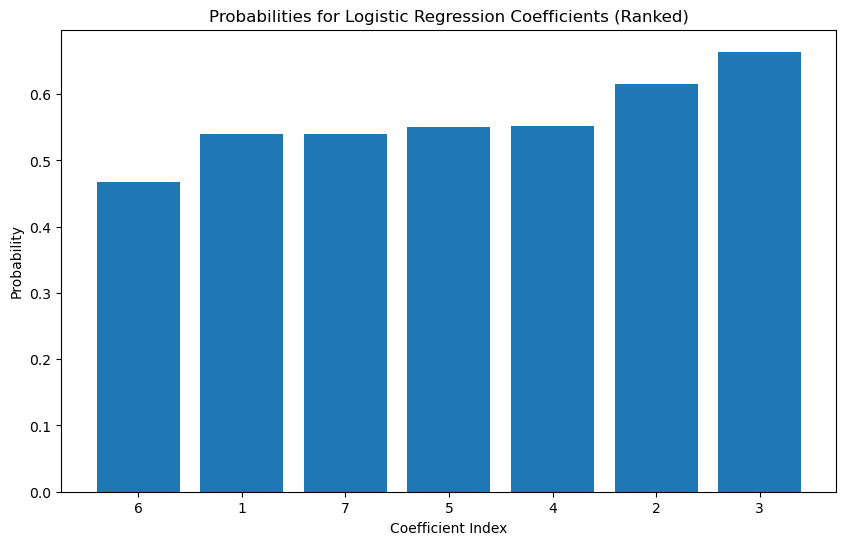

In [37]:
### Extract coefficients and their corresponding indices
coefficients = out.params[1:]
sorted_indices = coefficients.argsort()

### Sort coefficients and probabilities accordingly
sorted_coefficients = coefficients.iloc[sorted_indices]
sorted_probabilities = [1 / (1 + math.exp(-coef)) for coef in sorted_coefficients]

### Convert indices to strings for tick labels
tick_labels = [str(index + 1) for index in sorted_indices]

### Plot sorted probabilities
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(sorted_probabilities) + 1), sorted_probabilities, tick_label=tick_labels)
plt.xlabel('Coefficient Index')
plt.ylabel('Probability')
plt.title('Probabilities for Logistic Regression Coefficients (Ranked)')
plt.show()

# More work:
# -classification table/matrix
# -odds ratios
# -confusion matrix

### 
### Save to .xls

In [ ]:
#summary = pd.read_html(out.summary().tables[1].as_html(), header=0, index_col=0)[0]

#summary.to_excel("out.xlsx")